<a href="https://colab.research.google.com/github/udaykiran83358gmailcom/aiml-lab/blob/main/aiml_lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2, parser='auto')

In [3]:
type(car_data)

sklearn.utils._bunch.Bunch

In [4]:
car_data.details


{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [5]:
car_data.details['version']

'2'

In [8]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [9]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [10]:
type(car_data)

pandas.core.frame.DataFrame

# splitting the data

In [11]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.3, random_state=20)

print('The Size of training data is : {}\n The size of testing data is : {}'.format(len(train_data),len(test_data)))


The Size of training data is : 1209
 The size of testing data is : 519


# checking summary statistics

In [12]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


# checking missing values

In [14]:
train_data.isnull().sum()

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
binaryClass    0
dtype: int64

# check for the categorical features

In [15]:
train_data['buying'].value_counts()

med      327
high     307
vhigh    291
low      284
Name: buying, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

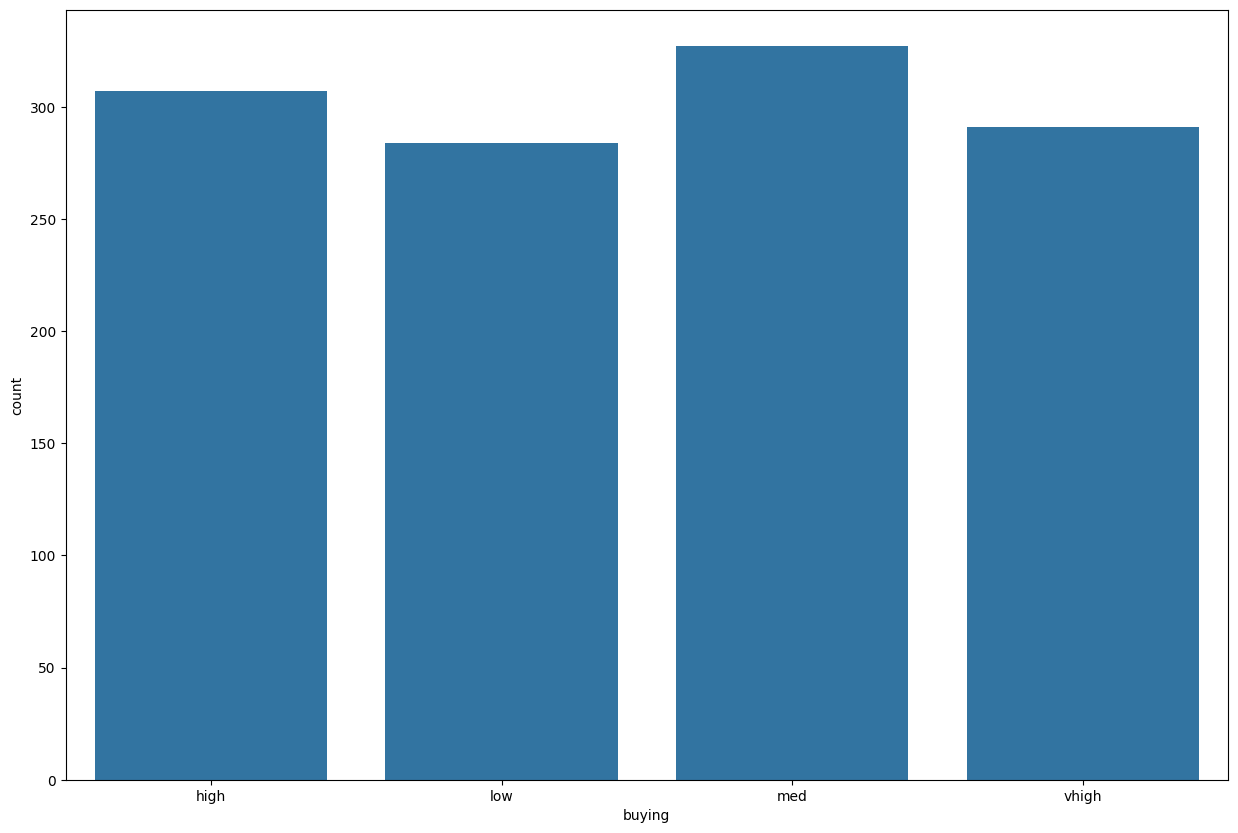

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='buying')

<Axes: xlabel='buying', ylabel='count'>

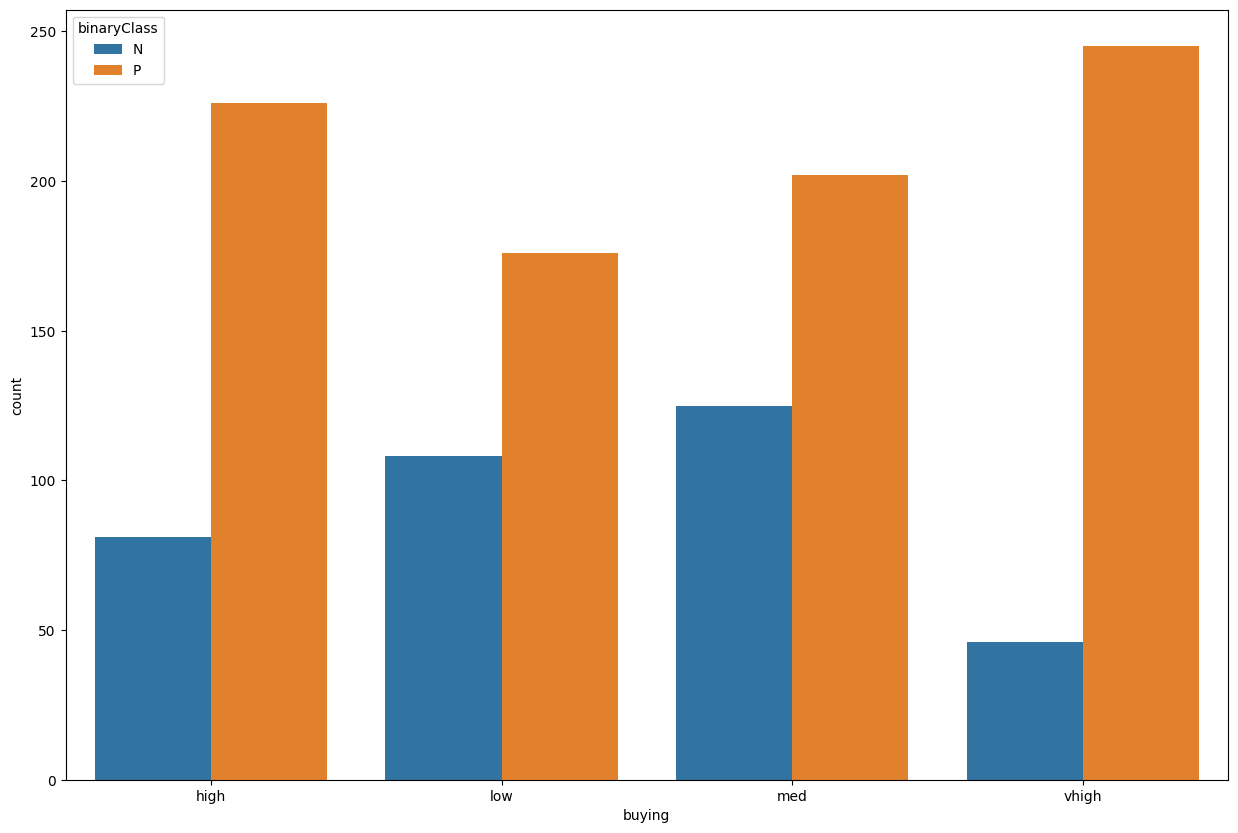

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='buying', hue='binaryClass')

<Axes: xlabel='doors', ylabel='count'>

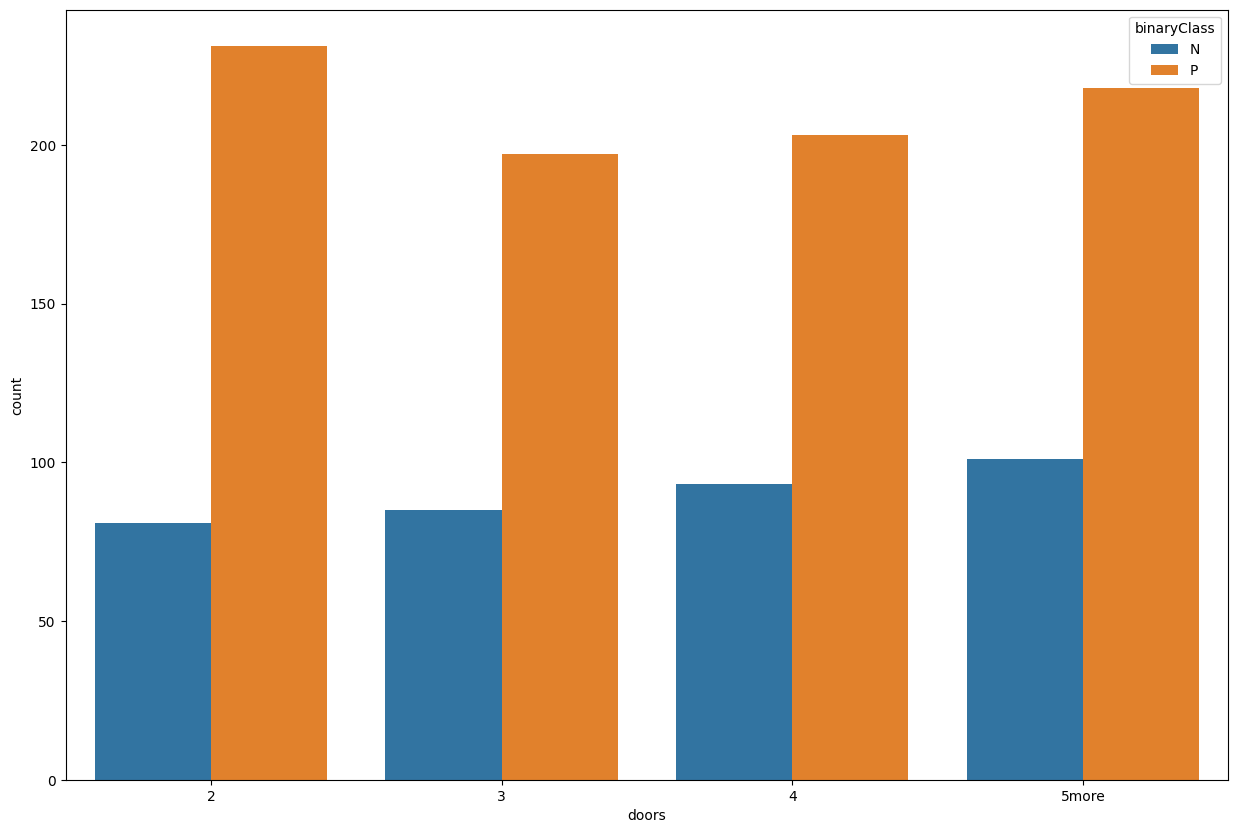

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='doors', hue='binaryClass')

# for more than two people or more

<Axes: xlabel='persons', ylabel='count'>

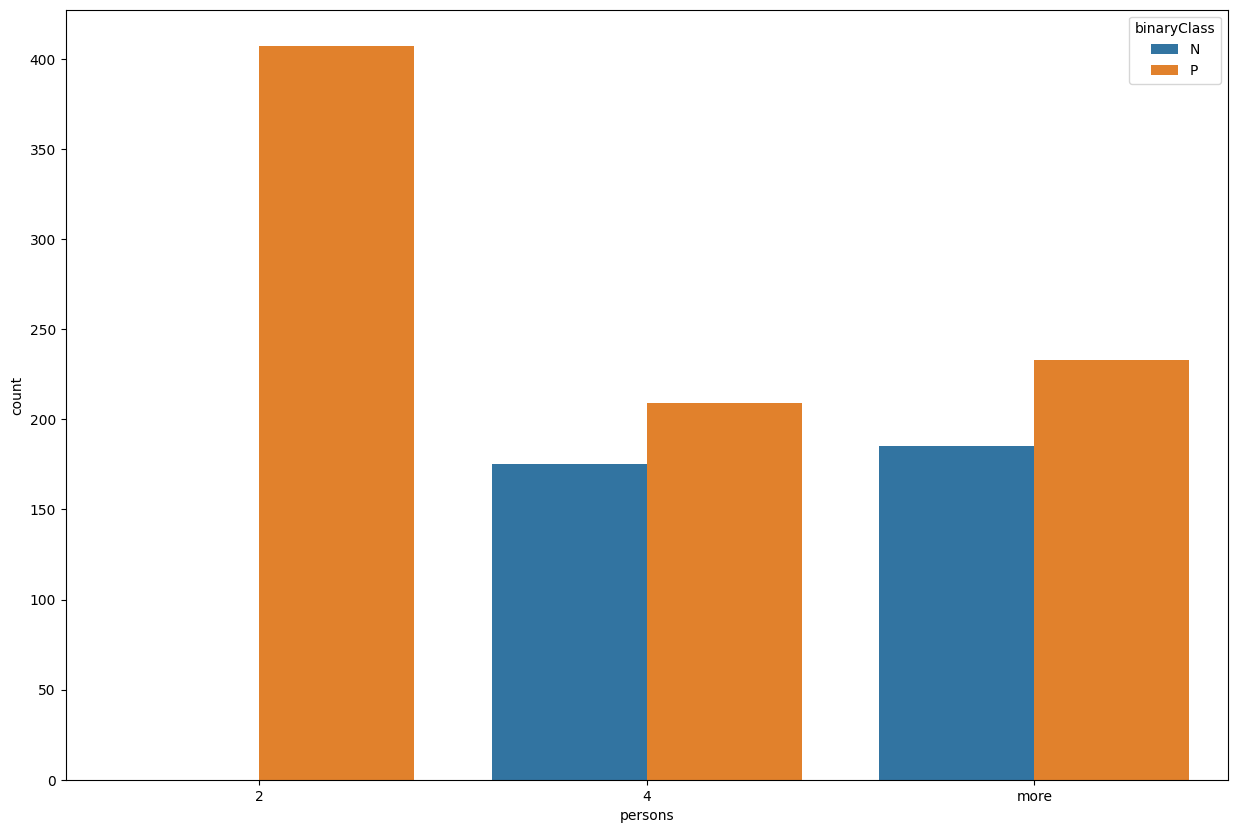

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='persons', hue='binaryClass')

In [23]:
train_data['lug_boot'].value_counts()

big      411
med      405
small    393
Name: lug_boot, dtype: int64

<Axes: xlabel='lug_boot', ylabel='count'>

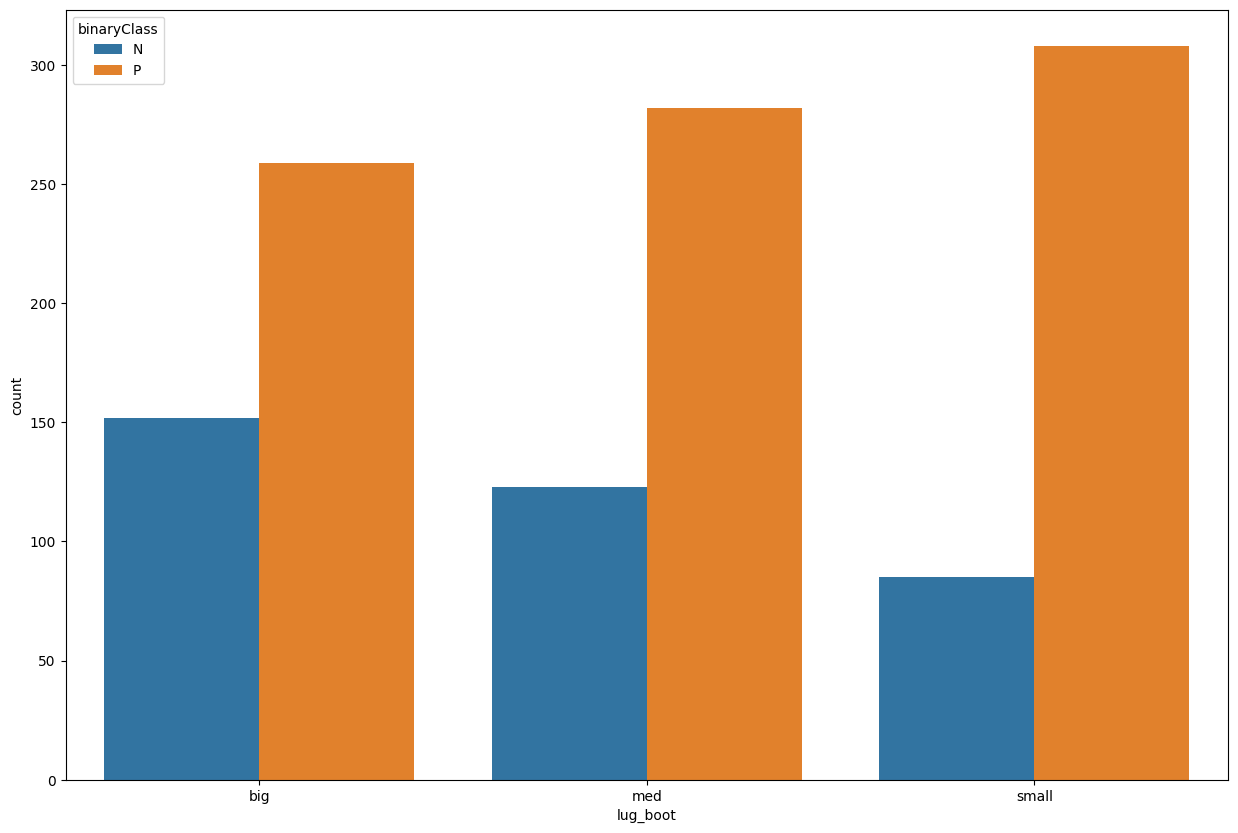

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='lug_boot', hue='binaryClass')

In [25]:
train_data['binaryClass'].value_counts()

P    849
N    360
Name: binaryClass, dtype: int64

In [29]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]